# **Projet Machine learning optimisation - ISE3**      

<div style="border: 2px solid #e74c3c; padding: 10px; border-radius: 5px; text-align: center; background-color: #fdecea; color: #c0392b; font-weight: bold;">
Descente de gradient Vs Newton
</div>

****
**MEMBRE DU GROUPE**
* 
* ANATO Diane
* NSIMOUESSA Dieuveil Nathan

<a id='top'></a>
## <div id=A style="color:black;display:fill;border-radius:5px;background-color:rgb(102, 102, 102);overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center;font-family: cursive;">TABLE DES MATIERES</p></div>

- <a href='#'>Introduction et présentation de la base de données du Titanic</a> 
- <a href='#1'>1.Importation de la base de données et quelque statisques descriptives</a> 
    - <a href='#1.1'>1.1. Importation de la base de données</a> 
    - <a href='#1.2'>1.2. quelque statisques descriptives</a> 
    
- <a href='#2'>2. Traitement des données manquantes</a> 

- <a href='#3.'>3. Modélisation</a> 
    - <a href='#3.1'>3.1. Contruction du modèle et optimisation par descente de gradient et Newton</a> 
    - <a href='#3.2'>3.2. Matrix de confusion et prédiction de la base Titanic</a> 
    - <a href='#B.3.3'>3.3. Convergence de la méthode de Newton et convergence de la descente de gradient</a> 
    
- <a href='#concl'>Conclusion</a> 

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center"> Introduction et présentation de la base de données du Titanic </p></div>

Dans ce travail, il est question d'établir la vitesse de convergence entre la descente de gradient et la méthode de Newton à partir d'un modèle classification de regression logistic dont la fonction d'activation est sigmoide puis prédire la chance de survie d'un passager. La base de donnée utilisé est celle du titanic obtenu sur Kaggle

### Dictionaire des Données (Data Dictionary)

- survival - Survival (0 = Non; 1 = Oui)

- class - Classe passager (1 = 1er ; 2 = 2e ; 3 = 3e)

- name - Nom

- sex - Genre

- age - Age

- sibsp - Nombre de frères et sœurs/conjoints à bord

- parch - Nombre de parents/enfants à bord

- ticket - Numéro de billet

- fare - Tarif passager

- cabin - Cabin

- embarked - Port d'Embarquement (C = Cherbourg ; Q = Queenstown ; S = Southampton)


## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">1.Importation de la base de données et quelque statisques descriptives </p></div>

> #  1.1. Importation de la base de données

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import sigmoid, logistic_cost, logistic_gradient,logistic_hessian, logistic_gradient_descent,logistic_newton_method
from sklearn.metrics import classification_report

%load_ext autoreload
%autoreload 2


In [2]:
# Charger les données Titanic
data = pd.read_csv("titanic.csv", sep=";")

In [3]:
#Chargement de la base de données
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Dimension du data set
data.shape

(1309, 12)

In [5]:
#Valeurs manquantes
print(data.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


> #  1.2. Importation de la base de données

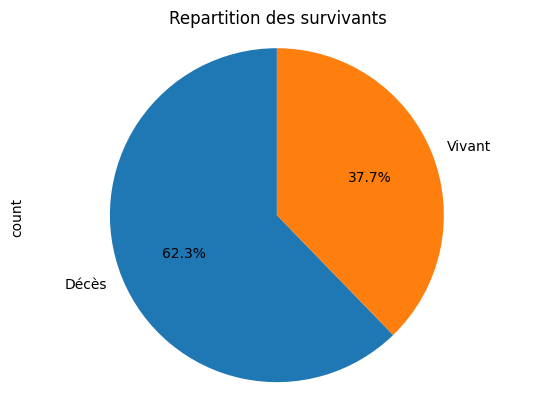

In [6]:
#Statistiques descriptives
#sns.countplot(data=data,x=data["Survived"])
plt.figure()
data["Survived"].value_counts().plot.pie(labels=["Décès","Vivant"],autopct='%1.1f%%', startangle=90)
# # Tracer le diagramme circulaire
# plt.figure(figsize=(8, 8))
# plt.pie(df['Valeur'], labels=df['Catégorie'], autopct='%1.1f%%', startangle=90)
plt.title('Repartition des survivants')
plt.axis('equal')  # Pour un cercle parfait
plt.show()



> On observe que sur 1039 passagers ayant voyagés abord du Titanic, 62,3%  étaient décès suite au naufrage contre 37,7% des survecus.

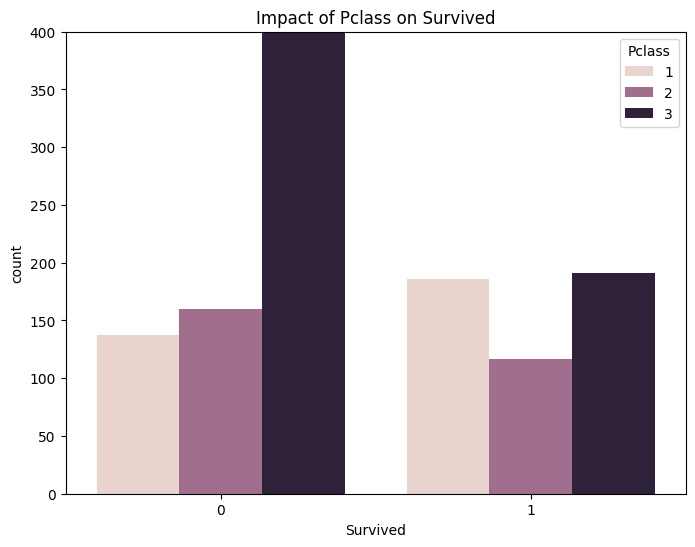

In [7]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=data, hue='Pclass' )
ax.set_ylim(0,400)
plt.title("Impact of Pclass on Survived")
plt.show()

>Il est annoté que parmi les personnes décés, la grande majorité était dans la classe 3 suivi de la classe 2. Cependant parmis les survivants on observe que, la grande majorité était situé en classe 1 et 3  

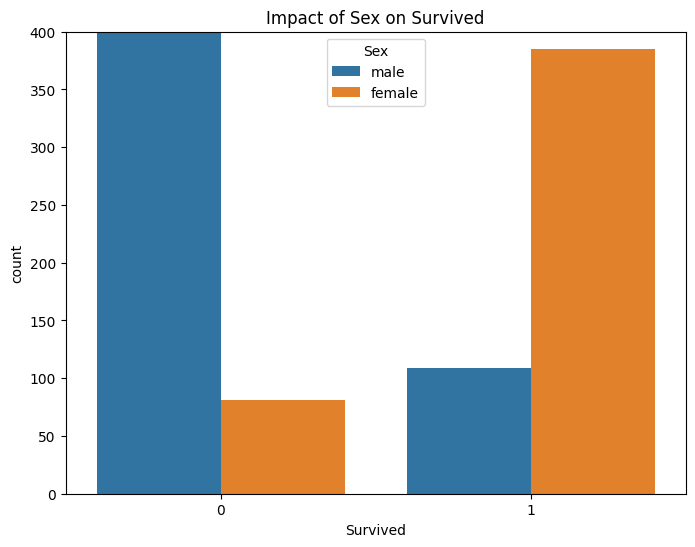

In [8]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=data, hue='Sex')
ax.set_ylim(0,400)
plt.title("Impact of Sex on Survived")
plt.show()

>On observe que les femmes ont plus survecu lors du naufrage de Titanic contrairement aux hommes.

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">2. Traitement des données manquantes </p></div>

In [9]:
# Prétraitement
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encodage des sexes
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)  # Suppression des colonnes inutiles
data = data.dropna()  # Suppression des valeurs manquantes

# Séparer les caractéristiques et la cible
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [10]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">3. Modélisation </p></div>

> #  3.1. Contruction du modèle et optimisation par descente de gradient et Newton

## Estimation de la fonction sigmoïde


$\sigma(z) = \frac{1}{1 + e^{-z}}$


où \( z \) est la combinaison linéaire des caractéristiques d'entrée, souvent exprimée comme :

$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n $

## Paramètres à optimiser

Les paramètres de la fonction sigmoïde à optimiser sont les coefficients \( \beta \) (qui incluent \( \beta_0 \), l'ordonnée à l'origine). Dans le cas de la régression logistique, nous voulons trouver les valeurs des coefficients \( \beta \) qui minimisent une fonction de coût, généralement la log-vraisemblance négative.

## Méthodes d'optimisation

1. **Méthode du gradient (Gradient Descent)**

    La méthode du gradient consiste à mettre à jour les coefficients en fonction du gradient de la fonction de coût par rapport à chaque coefficient.

    ### Fonction de coût :
    $
    J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)})) \right]
    $

    ### Mise à jour des coefficients :
    $
    \beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}
    $

    où \( \alpha \) est le taux d'apprentissage et \( \frac{\partial J}{\partial \beta_j} \) est le gradient de la fonction de coût par rapport à \( \beta_j \).

2. **Méthode de Newton (Newton's Method)**

    La méthode de Newton utilise la seconde dérivée pour ajuster les coefficients. Elle converge généralement plus rapidement que la méthode du gradient.

    ### Mise à jour des coefficients :
    $
    \beta := \beta - H^{-1} g
    $

    où \( g \) est le gradient (première dérivée) et \( H \) est la matrice Hessienne (seconde dérivée) de la fonction de coût.

    ### Calcul du gradient :
    $
    g = \frac{\partial J}{\partial \beta}
    $

    ### Calcul de la matrice Hessienne :
    $
    H = \frac{\partial^2 J}{\partial \beta^2}
    $



In [11]:
# Optimisation
theta_gd_1, costs_gd_1 = logistic_gradient_descent(X_train, y_train, alpha=1e-1, max_iter=100)
theta_gd_2, costs_gd_2 = logistic_gradient_descent(X_train, y_train, alpha=1e-2, max_iter=100)
theta_gd_3, costs_gd_3 = logistic_gradient_descent(X_train, y_train, alpha=1e-3, max_iter=100)
theta_gd_4, costs_gd_4 = logistic_gradient_descent(X_train, y_train, alpha=1e-4, max_iter=100)
theta_gd_5, costs_gd_5 = logistic_gradient_descent(X_train, y_train, alpha=1e-5, max_iter=100)
#theta_gd_6, costs_gd_6 = gradient_descent(X_train, y_train, alpha=1e-6 max_iter=100)


theta_newton, costs_newton = logistic_newton_method(X_train, y_train, max_iter=100)



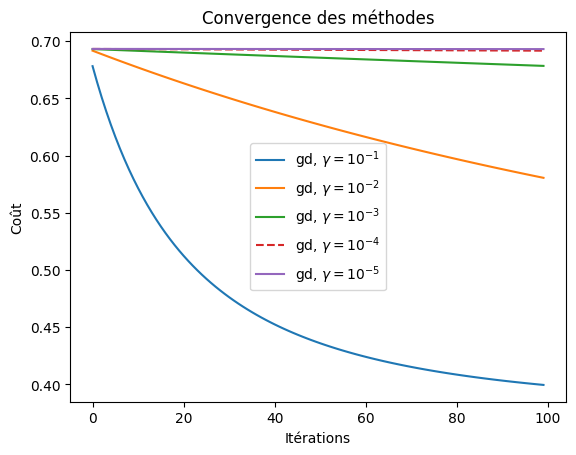

In [12]:
plt.plot(costs_gd_1, label="gd, $\gamma = 10^{-1}$")
plt.plot(costs_gd_2, label="gd, $\gamma = 10^{-2}$")
plt.plot(costs_gd_3, label="gd, $\gamma = 10^{-3}$")
plt.plot(costs_gd_4, label="gd, $\gamma = 10^{-4}$", linestyle='--')
plt.plot(costs_gd_5, label="gd, $\gamma = 10^{-5}$")
#plt.plot(costs_gd_6, label="gd, $\gamma = 10^{-6}$", linestyle='..')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Convergence des méthodes')
plt.legend()
plt.show()

 > On constate que suite aux 5 différentes valeurs du taux d'apprentissage, le meilleure taux d'apprentissage qui nous permet de vite converger apres 100 itérations est $\gamma = 10^{-1}$.

> # 3.2. Matrix de confusion et prédiction de la base Titanic

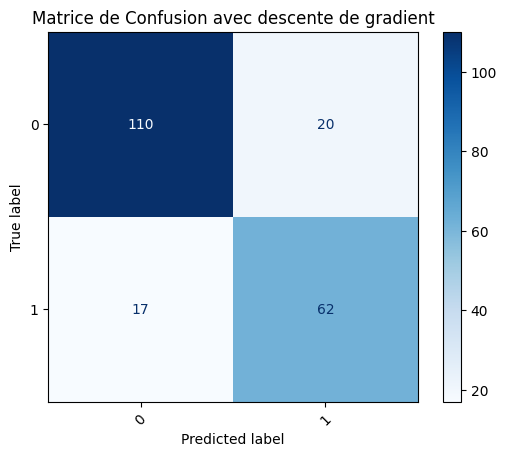

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_pred_gd = (sigmoid(X_test @ theta_gd_1) >= 0.5).astype(int)
y_pred_newton = (sigmoid(X_test @ theta_newton) >= 0.5).astype(int)

# Performance
accuracy_gd = accuracy_score(y_test, y_pred_gd)
accuracy_newton = accuracy_score(y_test, y_pred_newton)

# print("Gradient Descent Theta:", theta_gd)
# print("Newton's Method Theta:", theta_newton)
# print(f"Gradient Descent Accuracy: {accuracy_gd:.4f}")
# print(f"Newton's Method Accuracy: {accuracy_newton:.4f}")

#y_pred = np.argmax(model.predict(x=X_test), axis=1) 

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_gd)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm ) # , display_labels= y_test_names  , display_labels=data.target_names
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion avec descente de gradient')
plt.xticks(rotation=45)
#plt.yticks(rotation=45) 
#plt.imshow(images[i])
plt.show()

In [14]:
 # Calculer la matrice de confusion
print(classification_report(y_test, y_pred_gd))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       130
           1       0.76      0.78      0.77        79

    accuracy                           0.82       209
   macro avg       0.81      0.82      0.81       209
weighted avg       0.82      0.82      0.82       209



In [15]:
print(f"Gradient Descent Accuracy: {accuracy_gd:.4f}")


Gradient Descent Accuracy: 0.8230


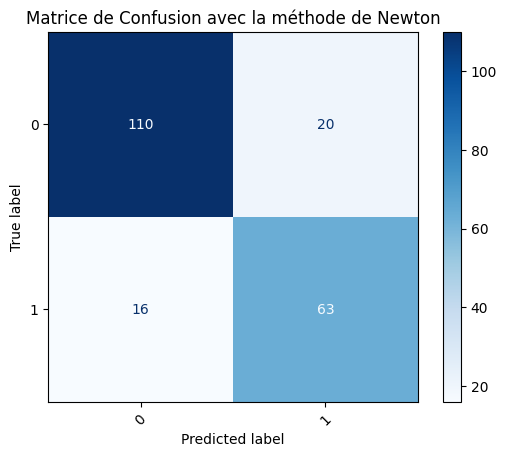

In [16]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_newton)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm ) # , display_labels= y_test_names  , display_labels=data.target_names
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion avec la méthode de Newton')
plt.xticks(rotation=45)
#plt.yticks(rotation=45) 
#plt.imshow(images[i])
plt.show()

In [17]:
print(classification_report(y_test, y_pred_newton))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       130
           1       0.76      0.80      0.78        79

    accuracy                           0.83       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.83      0.83      0.83       209



In [18]:
print(f"Newton's Method Accuracy: {accuracy_newton:.4f}")

Newton's Method Accuracy: 0.8278


> # 3.3. Convergence de la méthode de Newton et convergence de la descente de gradient

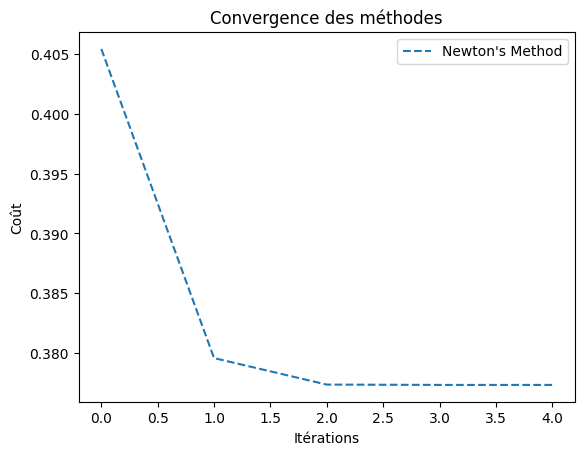

In [19]:
# Tracer la convergence
import matplotlib.pyplot as plt

#plt.plot(costs_gd, label='Gradient Descent')
plt.plot(costs_newton, label="Newton's Method", linestyle='--')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Convergence des méthodes')
plt.legend()
plt.show()

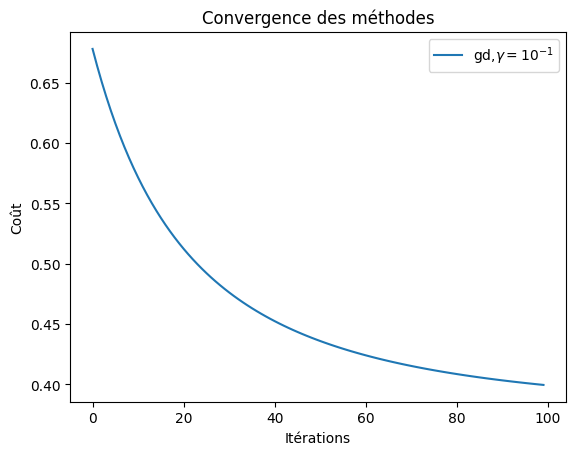

In [20]:
plt.plot(costs_gd_1, label='gd,$\gamma = 10^{-1}$')
#plt.plot(costs_newton, label="Newton's Method", linestyle='--')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Convergence des méthodes')
plt.legend()
plt.show()


## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center"> Conclusion </p></div>

> On observe qu' entre la méthode de Newton et la descente de gradient, la méthode de Newton converge plus rapidement que la descente de gradient avec un taux d'apprentissage de $\gamma = 10^{-1}$ dans ce modèle de classification de regression logistique, avec le meme nombre d'itérations fixé à 100.